In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cmocean
import matplotlib.gridspec as gridspec

import matplotlib

from matplotlib.animation import FuncAnimation, writers, PillowWriter, FFMpegWriter

from glob import glob
from datetime import timedelta


from datetime import datetime
from tqdm import tqdm
from IPython.display import HTML

import matplotlib.ticker as mticker

In [12]:
path_flow = '/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/'
files = sorted(glob(path_flow + 'psy4v3r1-daily_KZ_*.nc'))

start_time = datetime.strptime('2019-01-20 12:00:00', '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime('2006-10-11 12:00:00', '%Y-%m-%d %H:%M:%S')
start_index = 0 
end_index = 0

for file in files:
    if file[-13:-3] == start_time.strftime('%Y-%m-%d'):
        end_index = files.index(file)
        
    if file[-13:-3] == end_time.strftime('%Y-%m-%d'):
        start_index = files.index(file)
    
files = files[start_index:end_index+1]

mesh_mask = xr.open_dataset('/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/coordinates.nc', decode_times=False)



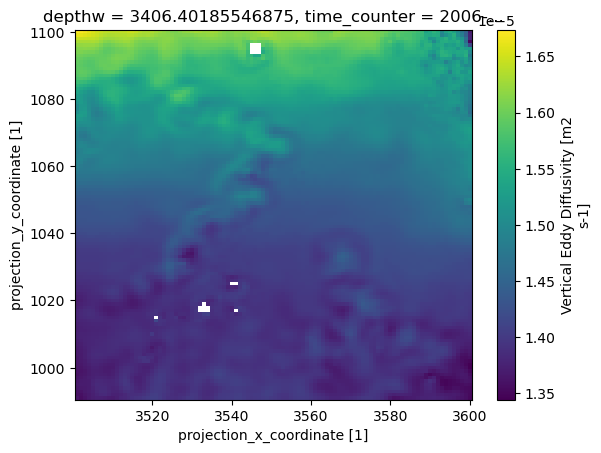

In [15]:
flow = xr.open_dataset(files[10])
indices = {'lat': range(990, 1100), 'lon': range(3500, 3600)}
flow['votkeavt'][44, indices['lat'], indices['lon']].plot()

In [21]:
A = flow['votkeavt'][:, indices['lat'], indices['lon']].values

In [28]:
np.nanmean(A, axis=(1,2)).shape

/tmp/ipykernel_681846/3224824516.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean(A, axis=(1,2)).shape


(50,)

In [17]:
flow['votkeavt'].shape

(50, 3059, 4322)

In [31]:
Kz_mean = np.zeros((len(files), 50))
Kz_std = np.zeros((len(files), 50))

time = np.zeros(len(files),dtype='datetime64[ns]')

In [33]:
for i, filename in enumerate(tqdm(files)):
    T = xr.open_dataset(filename)
    Kz = T['votkeavt'][:, indices['lat'], indices['lon']].values
    
    Kz_mean[i] = np.nanmean(Kz, axis=(1,2));
    Kz_std[i] = np.nanstd(Kz, axis=(1,2));
    
    time[i] = T['time_counter'].values

  0%|          | 0/4485 [00:00<?, ?it/s]/tmp/ipykernel_681846/3355078816.py:5: RuntimeWarning: Mean of empty slice
  Kz_mean[i] = np.nanmean(Kz, axis=(1,2));
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_681846/3355078816.py:5: RuntimeWarning: Mean of empty slice
  Kz_mean[i] = np.nanmean(Kz, axis=(1,2));
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_681846/3355078816.py:5: RuntimeWarning: Mean of empty slice
  Kz_mean[i] = np.nanmean(Kz, axis=(1,2));
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=

KeyboardInterrupt: 